# Data Analysis Workflow

## Notebook Title
# Brent Oil Prices Data Analysis Workflow

## Introduction

This notebook outlines the data analysis workflow for studying the relationship between Brent oil prices and major global events.
The objective is to provide data-driven insights on how political, economic, and social events impact Brent oil prices.


## Section 1: Data Analysis Workflow Steps

### Step 1: Data Loading and Preprocessing

- Load Brent Oil Prices data from the CSV file.
- Check for missing values, outliers, and data consistency.
- Convert date columns to datetime format and set up the data for time series analysis.


### Step 2: Exploratory Data Analysis (EDA)

- Visualize trends, seasonality, and possible correlations within the data.
- Identify key statistics (e.g., mean, median) and examine distribution of oil prices over time.


### Step 3: Model Selection and Initial Hypotheses

- Review time series models like ARIMA, GARCH, or Bayesian models.
- Define initial hypotheses on how events might correlate with oil price changes.


### Step 4: Assumptions and Limitations

- Note assumptions (e.g., stationarity of data for time series models).
- Identify limitations, such as external data dependencies or non-stationary events.


### Step 5: Communicating Results

- Determine the channels (e.g., report, blog post) and formats (e.g., visualizations, summary tables) for sharing insights.



## Import the nessesary Library

In [38]:
import os
print(os.getcwd())  # This prints the current working directory
os.chdir(r'c:\users\ermias.tadesse\10x\Oil-Price-Insights')  # Set the working directory to the project root

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import ruptures as rpt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
import seaborn as sns

c:\users\ermias.tadesse\10x\Oil-Price-Insights


## Initialize DataProcessor Instance

### Data Loading and Preprocessing
We initialize the `DataProcessor` class with the path to the Brent oil prices CSV file. This class handles data loading, parsing, and initial cleaning steps.

In [40]:
# Load the dataset
file_path = 'Data/Raw/BrentOilPrices.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


### Inspect the dataset for missing values and data types

In [41]:
# Inspect the dataset for missing values and data types
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


Date     0
Price    0
dtype: int64

### Data PreProcessing

In [42]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='mixed')

# Sort the data by date
data = data.sort_values(by='Date')

# Reset index after sorting
data.reset_index(drop=True, inplace=True)

## Exploratory Data Analysis (EDA)

### Basic Statistics

In [5]:
data.describe()

,Date,Price
count,9011,9011.000000
mean,2005-02-10 23:46:53.760958720,48.420782
min,1987-05-20 00:00:00,9.100000
25%,1996-03-20 12:00:00,19.050000
50%,2005-02-02 00:00:00,38.570000
75%,2014-01-09 12:00:00,70.090000
max,2022-11-14 00:00:00,143.950000
std,NaN,32.860110


### Visualize Data:

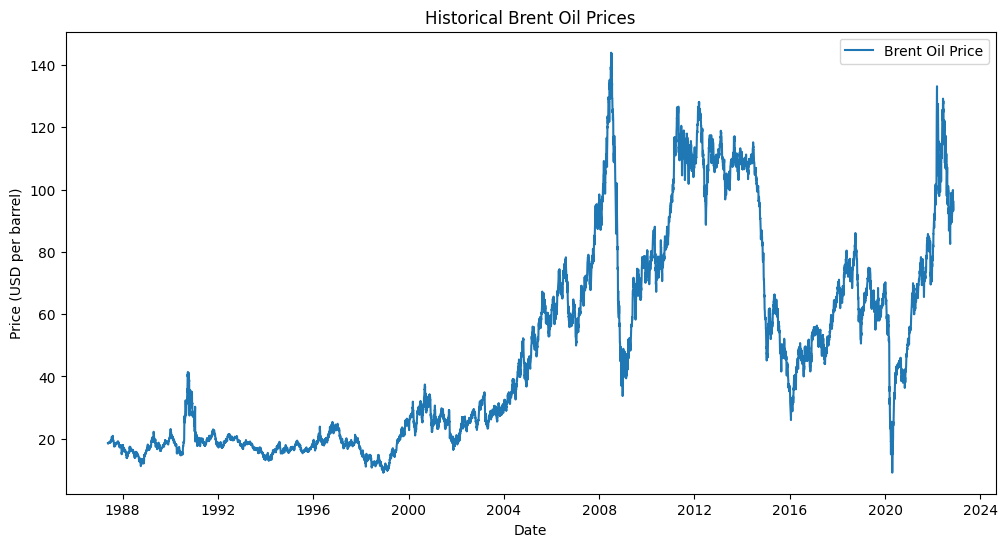

In [6]:
# Plot the time series data to identify trends and patterns:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.title('Historical Brent Oil Prices')
plt.legend()
plt.show()

### distribution of Brent oil prices

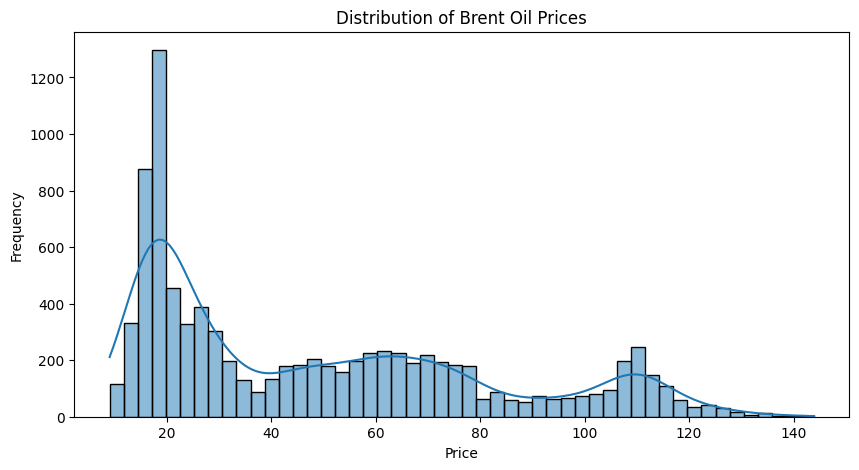

In [43]:
# Plot the distribution of Brent oil prices
plt.figure(figsize=(10, 5))
sns.histplot(data['Price'], bins=50, kde=True)
plt.title('Distribution of Brent Oil Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Identify Outliers:

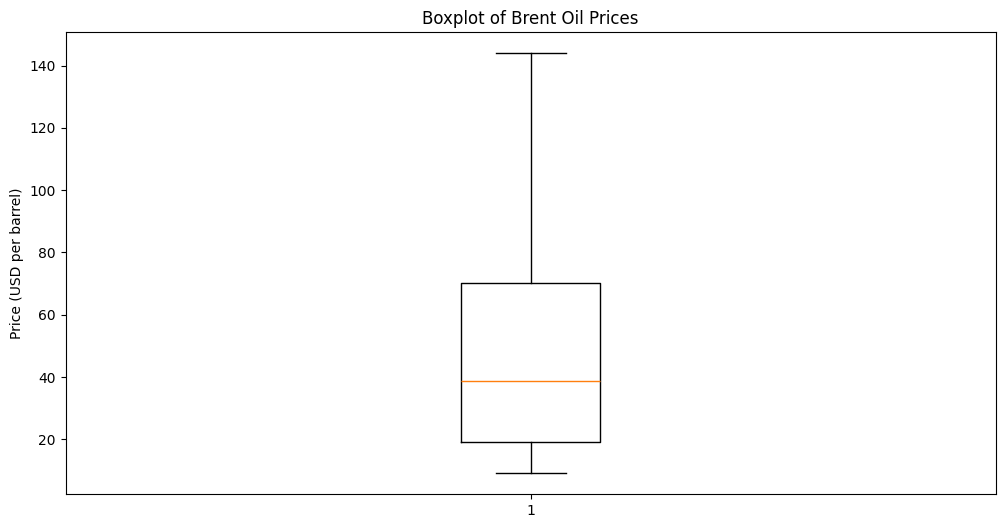

In [7]:
plt.figure(figsize=(12, 6))
plt.boxplot(data['Price'])
plt.title('Boxplot of Brent Oil Prices')
plt.ylabel('Price (USD per barrel)')
plt.show()

### Plotting a rolling mean and standard deviation

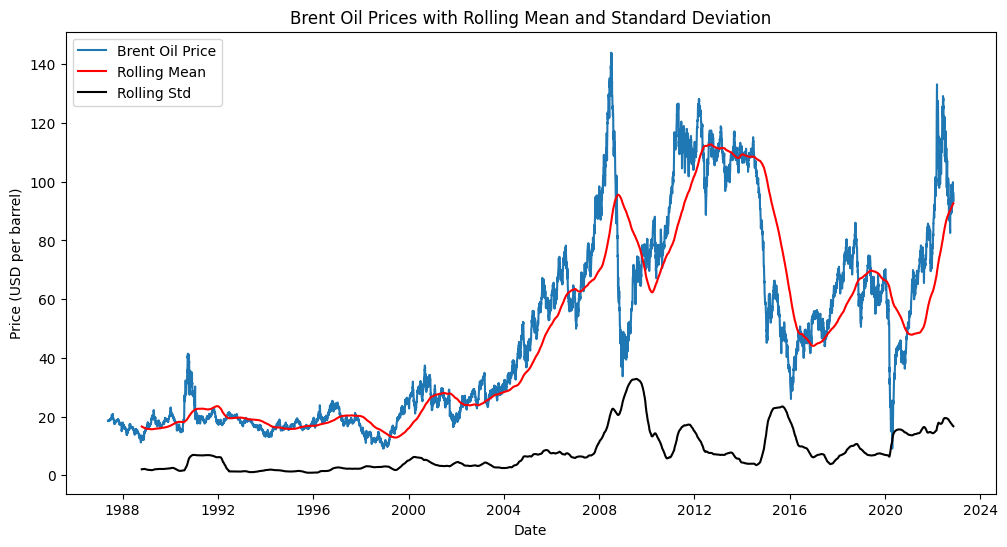

In [8]:
# Plotting a rolling mean and standard deviation
rolling_window = 365  # One year window

data['Rolling Mean'] = data['Price'].rolling(window=rolling_window).mean()
data['Rolling Std'] = data['Price'].rolling(window=rolling_window).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Brent Oil Price')
plt.plot(data['Date'], data['Rolling Mean'], color='red', label='Rolling Mean')
plt.plot(data['Date'], data['Rolling Std'], color='black', label='Rolling Std')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.title('Brent Oil Prices with Rolling Mean and Standard Deviation')
plt.legend()
plt.show()

### Further Analysis: Dive Deeper into Patterns and Trends, Including Seasonal Analysis
To dive deeper into patterns and trends, including seasonal analysis, we can perform the following steps:

1. Decompose the Time Series: Decompose the Brent oil prices data into trend, seasonal, and residual components.
2. Seasonal Analysis: Analyze and visualize the seasonal component.
3. Correlation Analysis: Analyze autocorrelations to understand the relationships between different lags.

#### Decompose the Time Series

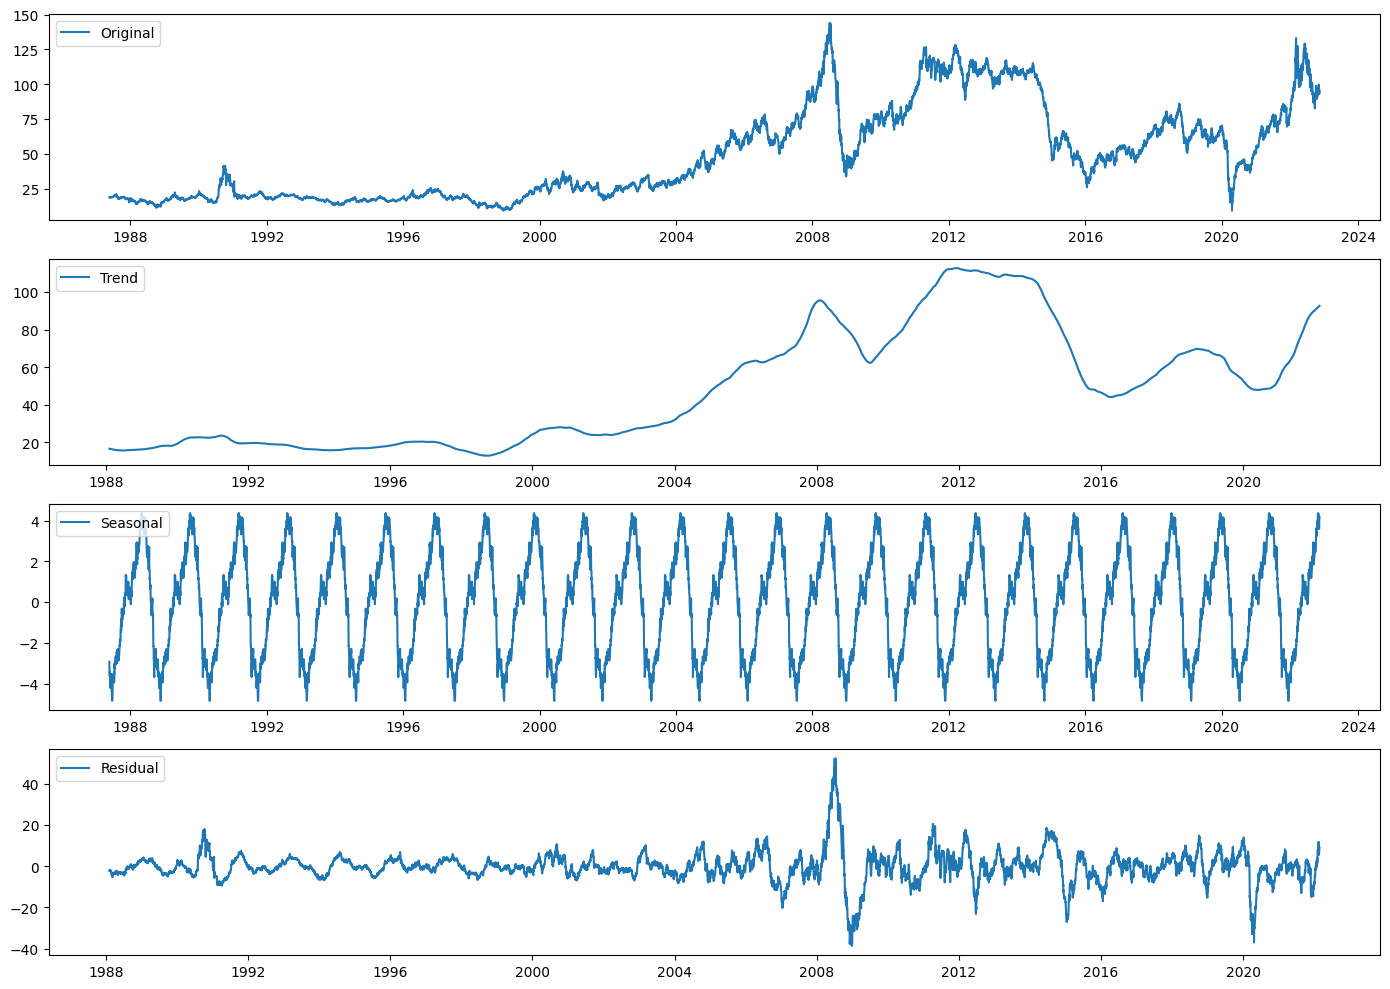

In [9]:
# Decompose the time series
decomposition = seasonal_decompose(data['Price'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(data['Date'], data['Price'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(data['Date'], decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(data['Date'], decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(data['Date'], decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Correlation Analysis

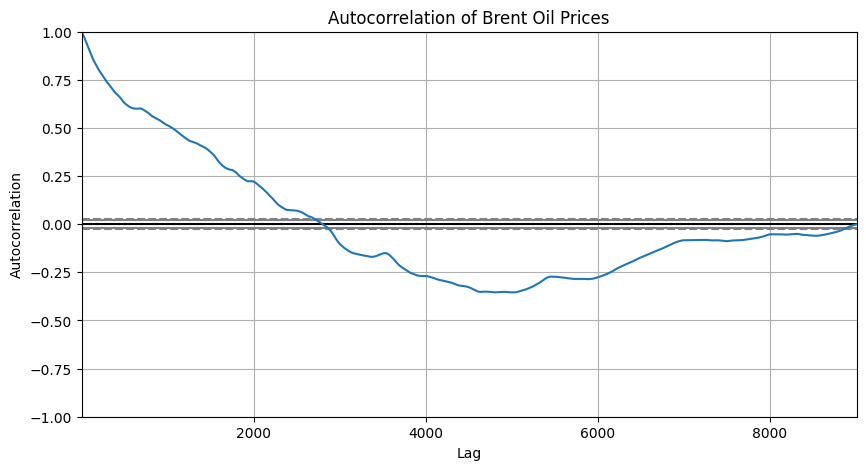

In [11]:
# Plot autocorrelation
plt.figure(figsize=(10, 5))
autocorrelation_plot(data['Price'])
plt.title('Autocorrelation of Brent Oil Prices')
plt.show()

## Model Selection and Initial Hypotheses

#### 1. ARIMA:

In [19]:
model = ARIMA(data['Price'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14540.613
Date:                Thu, 31 Oct 2024   AIC                          29093.226
Time:                        21:45:10   BIC                          29135.862
Sample:                             0   HQIC                         29107.733
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0260      0.006      4.344      0.000       0.014       0.038
ar.L2         -0.0235      0.006     -4.231      0.000      -0.034      -0.013
ar.L3         -0.0071      0.005     -1.507      0.1

### 2. GARCH

In [20]:
model = arch_model(data['Price'], vol='Garch', p=1, q=1)
model_fit = model.fit()
print(model_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 97378349170.75806
Iteration:      2,   Func. Count:     12,   Neg. LLF: 70149.2042068351
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1851811015.0339441
Iteration:      4,   Func. Count:     27,   Neg. LLF: 44034.729057607685
Iteration:      5,   Func. Count:     33,   Neg. LLF: 43698.83708600999
Iteration:      6,   Func. Count:     39,   Neg. LLF: 46134.33970540376
Iteration:      7,   Func. Count:     45,   Neg. LLF: 39816.66774832398
Iteration:      8,   Func. Count:     51,   Neg. LLF: 42848.420329461354
Iteration:      9,   Func. Count:     57,   Neg. LLF: 35637.13926185758
Iteration:     10,   Func. Count:     62,   Neg. LLF: 41279.10043111231
Iteration:     11,   Func. Count:     68,   Neg. LLF: 39707.41740071211
Iteration:     12,   Func. Count:     77,   Neg. LLF: 35582.89771940086
Iteration:     13,   Func. Count:     83,   Neg. LLF: 35540.59359118322
Iteration:     14,   Func. Count:     89,   Neg. LLF: 35231.00

## Detailed Model Inputs, Parameters, and Outputs

For time series analysis of Brent oil prices, two commonly used models are **ARIMA** and **GARCH**.

1. **ARIMA (Auto-Regressive Integrated Moving Average)**:
   - **Inputs**: Past values of the time series data, lag order (p), differencing order (d), and moving average order (q).
   - **Parameters**:
     - `p`: Number of lag observations.
     - `d`: Degree of differencing.
     - `q`: Size of the moving average window.
   - **Outputs**: Forecasted prices and confidence intervals for future values.
   
2. **GARCH (Generalized Autoregressive Conditional Heteroskedasticity)**:
   - **Inputs**: Series of residuals from the ARIMA model or returns.
   - **Parameters**:
     - `p`: Number of lag terms for the autoregressive component.
     - `q`: Number of lag terms for the moving average component.
   - **Outputs**: Predicted variance (volatility) over future periods.

These models help forecast price movements and estimate volatility, essential in understanding potential fluctuations in Brent oil prices.


## Understanding Data Generation and Assumptions

The Brent oil price data is generally collected from financial markets, where the price reflects the global demand and supply balance. The data is subject to external factors, including geopolitical events, natural disasters, and economic policies.

### Assumptions
1. **Stationarity**: Time series models like ARIMA assume the data is stationary (constant mean and variance over time). However, Brent oil prices may be influenced by long-term trends, requiring transformations.
2. **Data Representativeness**: Historical prices may not fully capture future market conditions due to unanticipated global events.

### Limitations
1. **Market Volatility**: Sudden market shifts, such as those caused by geopolitical issues, are not easily captured by historical trends alone.
2. **Unobserved Factors**: External events not included in the dataset can significantly impact oil prices, limiting model accuracy.


## References to Key Concepts and Models

1. **ARIMA**: A linear model capturing trends and seasonality by adjusting past values (AR), differencing (I), and smoothing past errors (MA).
   - *Reference*: Box, G., & Jenkins, G. (1976). "Time Series Analysis: Forecasting and Control".

2. **GARCH**: A model used to estimate time-dependent volatility, suitable for financial time series data.
   - *Reference*: Engle, R. (1982). "Autoregressive Conditional Heteroscedasticity with Estimates of the Variance of UK Inflation".
   
3. **Application to Brent Oil Prices**: These models are valuable for understanding short-term fluctuations and estimating future price volatility in oil markets.


## Expected Outputs and Limitations for Time Series Models

### ARIMA Model
- **Expected Outputs**: Forecasted price values with a confidence interval for each time period.
- **Limitations**: Assumes linear relationships and may struggle with sudden, unexpected changes in the market.

### GARCH Model
- **Expected Outputs**: Volatility estimates, predicting the variability in price movements.
- **Limitations**: Works best for high-frequency data; may provide limited insights for low-frequency oil prices data.


C:\Users\ermias.tadesse\AppData\Local\Temp\ipykernel_5976\1665727519.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.asfreq('D').fillna(method='ffill')  # Fill missing days


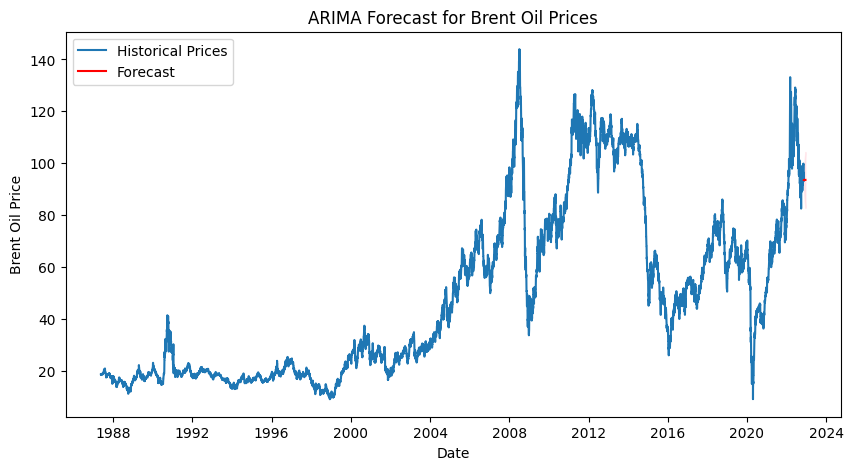

In [22]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare the data for ARIMA
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.asfreq('D').fillna(method='ffill')  # Fill missing days

# Define and fit the ARIMA model
arima_order = (5, 1, 0)  # Adjust the order as needed based on AIC/BIC optimization
arima_model = ARIMA(data['Price'], order=arima_order)
arima_results = arima_model.fit()

# Forecast future values
forecast = arima_results.get_forecast(steps=30)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(data['Price'], label='Historical Prices')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Brent Oil Price')
plt.title('ARIMA Forecast for Brent Oil Prices')
plt.legend()
plt.show()


c:\Users\ermias.tadesse\10x\Oil-Price-Insights\venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004434. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


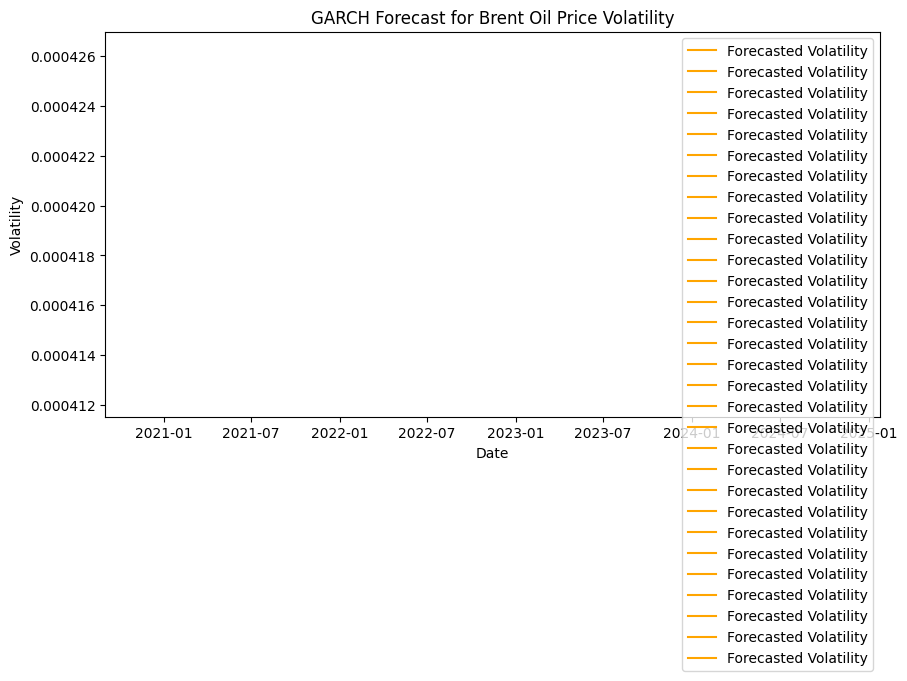

In [23]:
from arch import arch_model

# Calculate returns (log returns for stationarity)
data['Returns'] = data['Price'].pct_change().dropna()

# Define and fit the GARCH model
garch_model = arch_model(data['Returns'].dropna(), vol='Garch', p=1, q=1)
garch_results = garch_model.fit(disp="off")

# Forecast volatility
garch_forecast = garch_results.forecast(horizon=30)

# Plot the volatility forecast
plt.figure(figsize=(10, 5))
plt.plot(garch_forecast.variance[-1:], label='Forecasted Volatility', color='orange')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('GARCH Forecast for Brent Oil Price Volatility')
plt.legend()
plt.show()


### Time Series Modeling and Change Point Detection

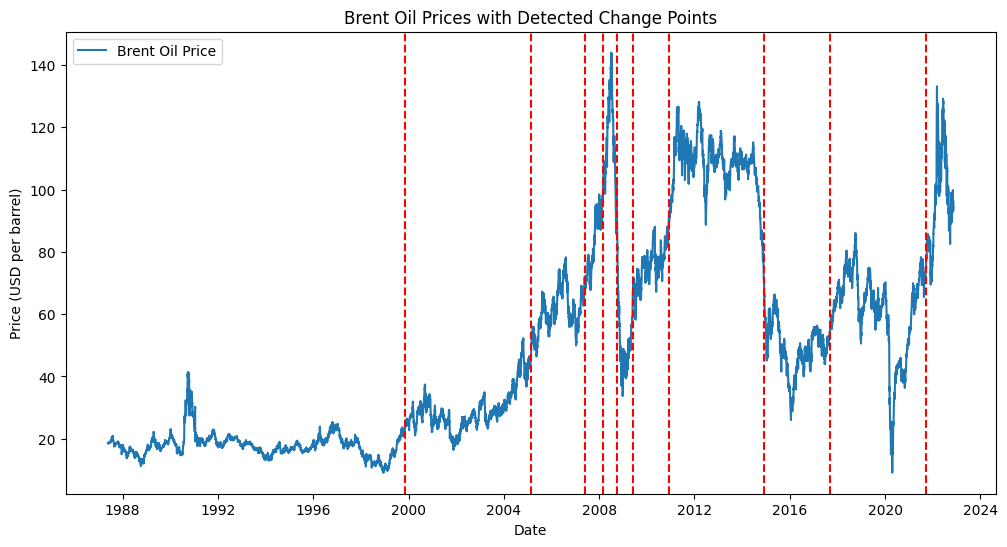

In [21]:
# Convert the price data to a numpy array for change point detection
price_array = data['Price'].values

# Define the change point detection model: Binary Segmentation with the L2 cost function
model = rpt.Binseg(model="l2").fit(price_array)
breakpoints = model.predict(n_bkps=10)  # We can adjust the number of breakpoints as needed

# Filter out the last breakpoint if it is equal to the length of the array
breakpoints = [bkpt for bkpt in breakpoints if bkpt < len(price_array)]

# Plot the detected change points
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Brent Oil Price')
for bkpt in breakpoints:
    plt.axvline(data['Date'].iloc[bkpt], color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.title('Brent Oil Prices with Detected Change Points')
plt.legend()
plt.show()